Index(['Unnamed: 0', 'FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass',
       'Orbit', 'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused',
       'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude',
       'Latitude'],
      dtype='object')


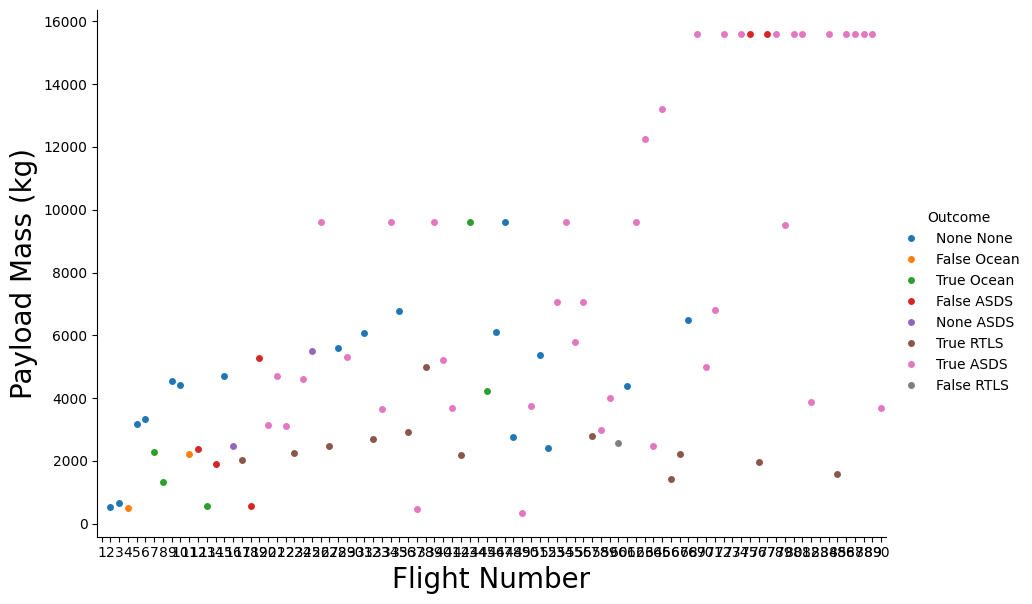

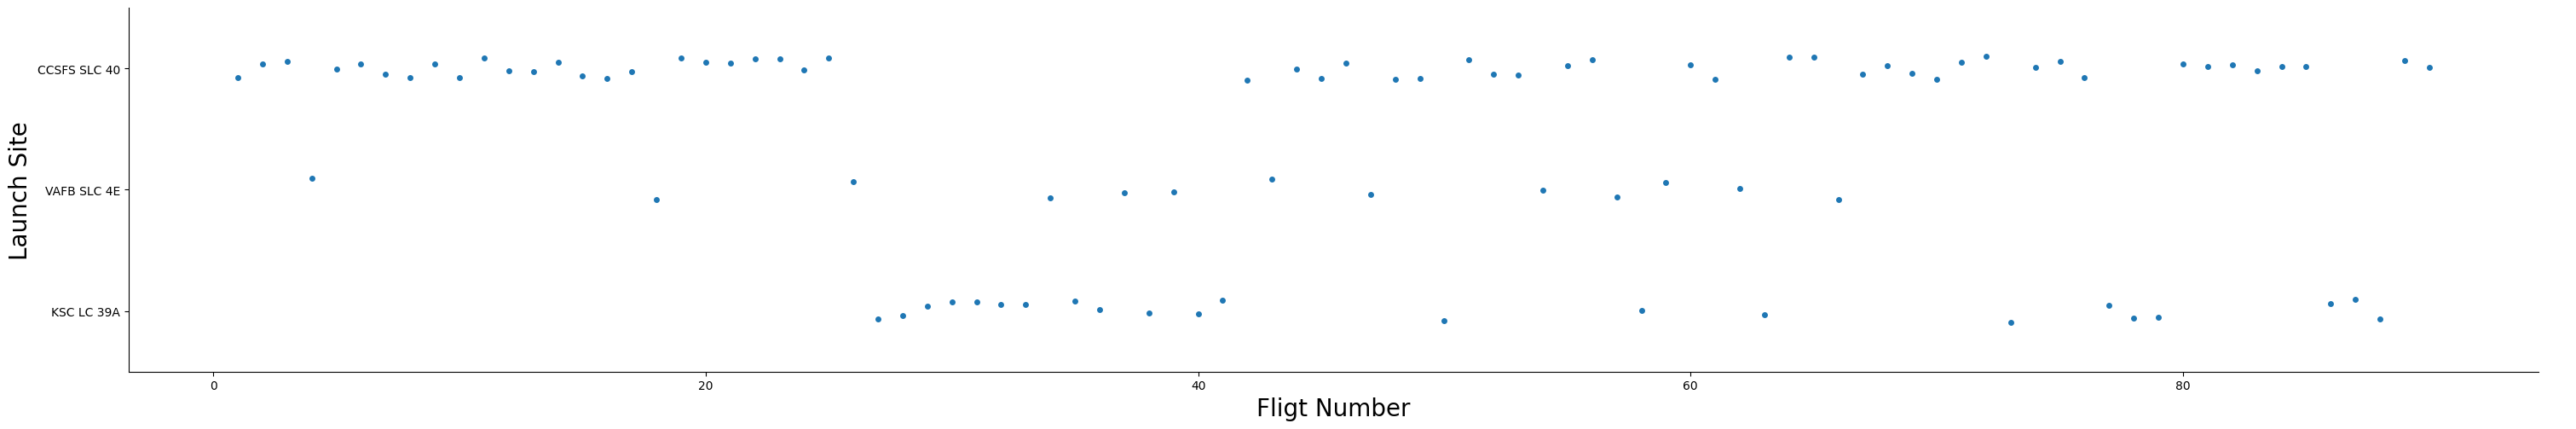

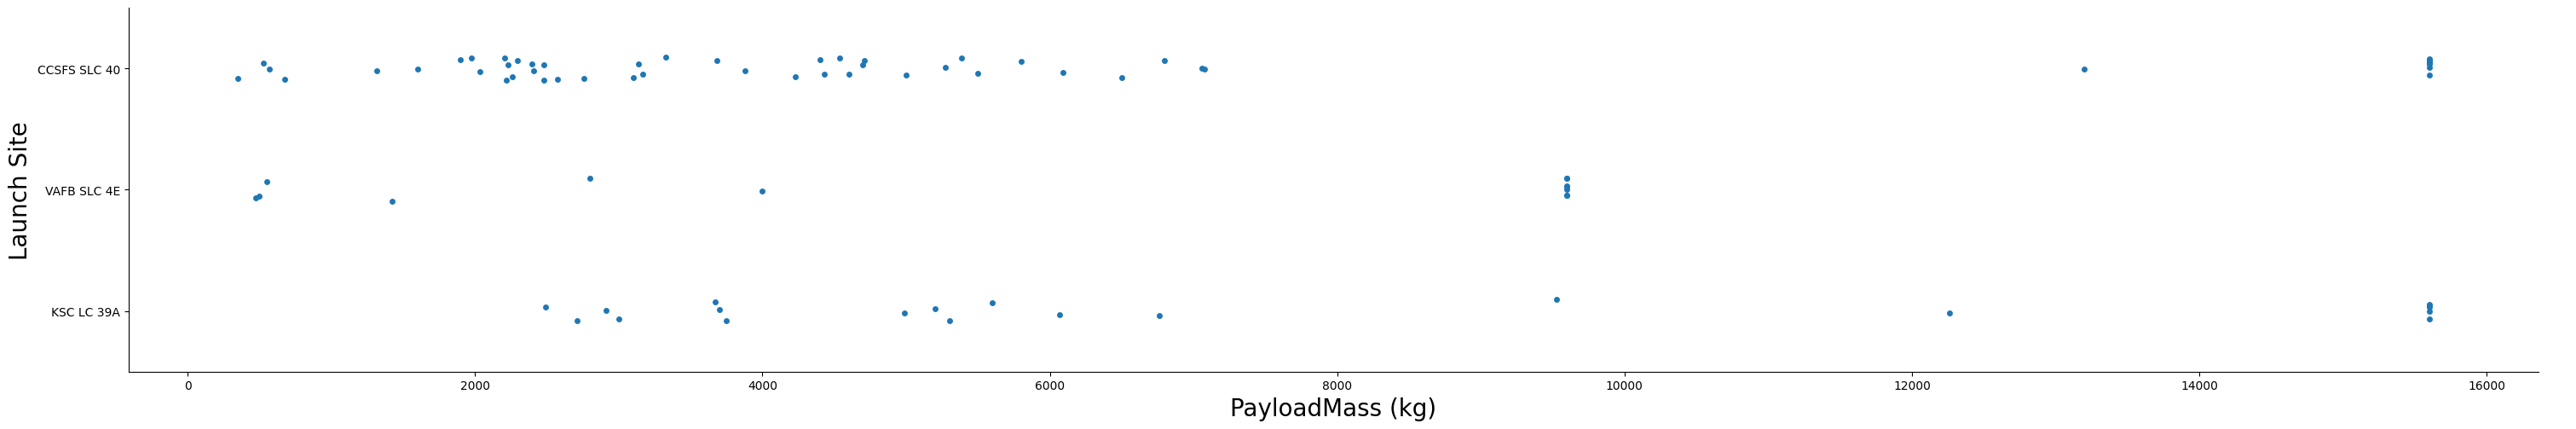

['None None' 'False Ocean' 'True Ocean' 'False ASDS' 'None ASDS'
 'True RTLS' 'True ASDS' 'False RTLS']
[0 1]


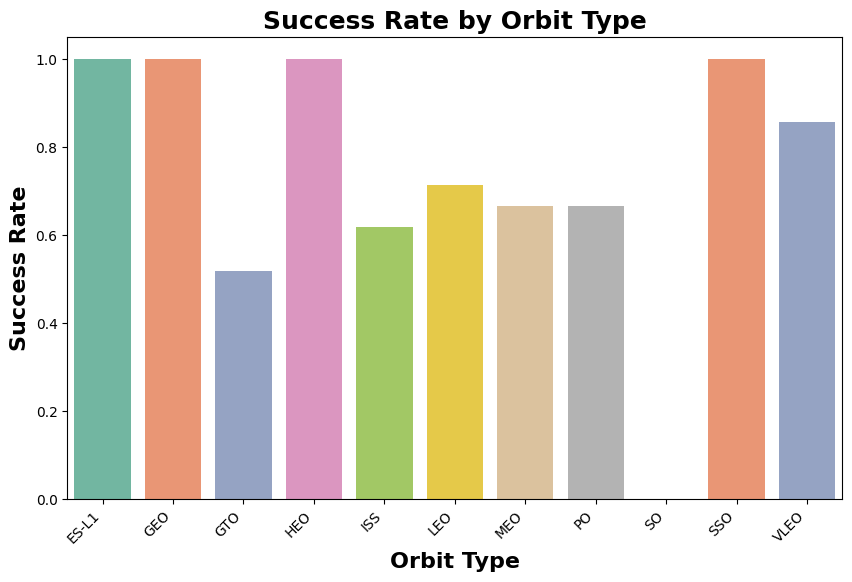

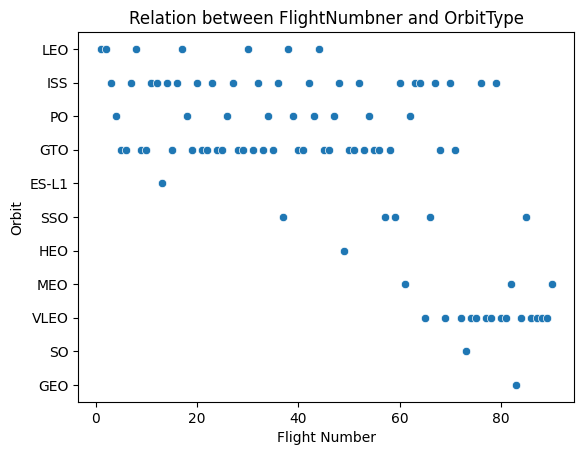

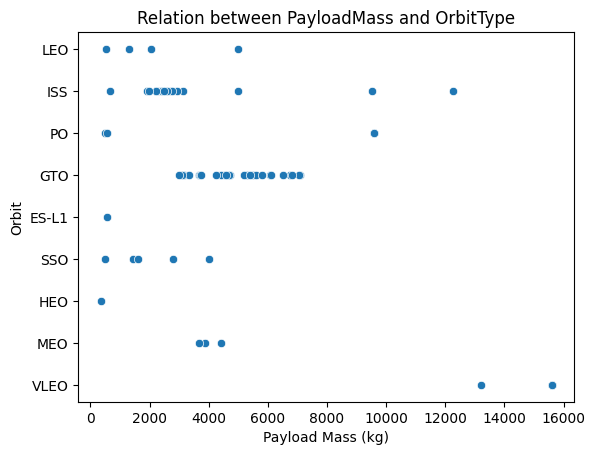

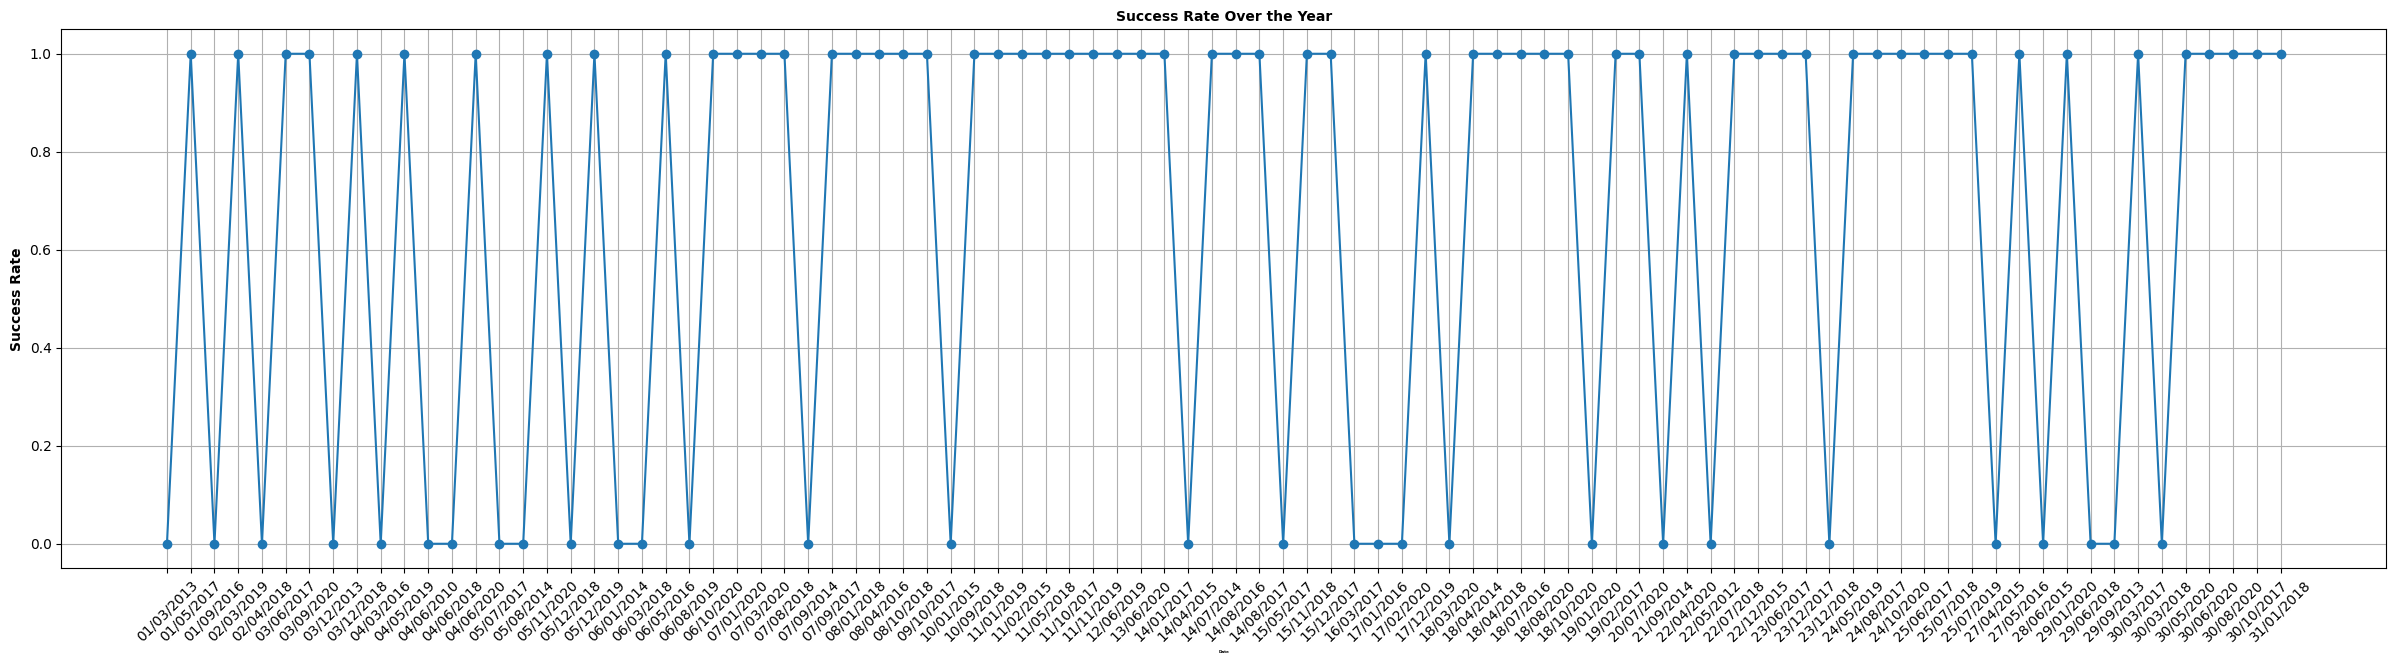

In [1]:
#Exploratory Data Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('SpaceX_Falcon9.csv')
print(data.columns)

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Outcome", data=data, aspect=1.5, height=6)

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Payload Mass (kg)", fontsize=20)
plt.show()


#Relationship between flight number and Launch Site
sns.catplot(x="FlightNumber", y="LaunchSite",data=data, aspect=6)
plt.xlabel("Fligt Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

sns.catplot(x="PayloadMass", y="LaunchSite",data=data, aspect=6)
plt.xlabel("PayloadMass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()


#orbit success rate
print(data['Outcome'].unique())

# Map the 'Outcome' column to 1 for success (e.g., 'True ASDS', 'True RTLS') and 0 for failure (e.g., 'False Ocean', 'None ASDS')
success_mapping = {
    'True Ocean': 1,  # success
    'True ASDS': 1,   # success
    'True RTLS': 1,   # success
    'False Ocean': 0, # failure
    'False ASDS': 0,  # failure
    'False RTLS': 0,  # failure
    'None ASDS': 0,   # failure
    'None None': 0    # failure
}

data['Outcome'] = data['Outcome'].map(success_mapping).fillna(0).astype(int)

# Check the unique values after mapping
print(data['Outcome'].unique())

# Group by 'Orbit' and calculate the success rate
orbit_success_rate = data.groupby('Orbit')['Outcome'].mean().reset_index()

# Create a bar plot showing the success rate for each orbit type
sns.barplot(
    x="Orbit",
    y="Outcome",
    data=orbit_success_rate,
    palette="Set2"
)

# Customize labels and title
plt.xlabel("Orbit Type", fontsize=16, weight='bold')
plt.ylabel("Success Rate", fontsize=16, weight='bold')
plt.title("Success Rate by Orbit Type", fontsize=18, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Increase figure size for better visibility
plt.gcf().set_size_inches(10, 6)

# Show the plot
plt.show()




sns.scatterplot(x="FlightNumber", y="Orbit",data = data)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Relation between FlightNumbner and OrbitType")
plt.show()


sns.scatterplot(x="PayloadMass", y="Orbit",data = data)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Relation between PayloadMass and OrbitType")
plt.show()



yearly_success_rate = data.groupby('Date')['Outcome'].mean().reset_index()
plt.figure(figsize=(30,7))
plt.plot(yearly_success_rate['Date'], yearly_success_rate['Outcome'], marker='o')
plt.xlabel("Date", fontsize=3, weight="bold")
plt.ylabel("Success Rate", fontsize=10, weight="bold")
plt.title("Success Rate Over the Year", fontsize=10, weight="bold")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()